In [32]:
def plot_keywords_per_job_title(position, keywords = None):
    """
    This code will return a graph that shows which percentage of ocurrences of each word in the list: keyword
    happen in each description of positions with words matching 
    
    position should be a string with a position name
    keywords should be a list of words that you want the function to search in the job descriptions  

    """
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    import warnings
    from collections import Counter
    warnings.filterwarnings("ignore")
    
    def remove_stop_split(x):
        import re
        """
        This function will have a string as an input, check all the words inside and return a string without
        any of these stopwords, and in lowercase.
        """
        stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
            "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
            "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
            "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
            "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
            "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
            "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at",
            "by", "for", "with", "about", "against", "between", "into", "through", "during",
            "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", 
            "on", "off", "over", "under", "again", "further", "then", "once", "here", "there",
            "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most",
            "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", 
            "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
        out = []
        descr = re.sub(r'[^\w\s]+'," ",x)
        for word in descr.split():
            if word not in stop:
                out.append(word.lower())
        return out

    #import the data
    data = pd.read_csv('export_usa.csv')
    
    #create a list with the words inputted as job title 
    position_words = position.lower().replace("data"," ").strip().split()
    
    #It will create a reduced dataset if all words from the input description are included in the job title 
    data['pos-in-data'] =[True if all (word in position for word in position_words) else False for position in data['pos_clean'] ]
    reduced_data = data[data['pos-in-data']]
    
    # Break the function if there are no matching words with the description    
    if len(reduced_data) == 0:
        print("No result found, try another description")
        return None
    
    #then we remove stopwords and make a new column with list of meaningful words for each job description
    reduced_data['descr_words'] = [remove_stop_split(des) for des in reduced_data['descr_cl']]
    
    #If the keywords are not added, or the input isn't a string, it will return the list of 50 more repeated words. 
    if keywords == None or not isinstance(keywords, list):
        all_the_words = [word for desc in reduced_data['descr_words'] for word in desc]
        all_the_words = Counter(all_the_words)
        all_the_words = pd.DataFrame.from_dict(all_the_words, orient='index').reset_index()
        all_the_words = all_the_words.sort_values(by=[0], ascending=False)
        all_the_words.columns = ['word','count']
        print("Couldn't find input keywords. Here are the 50 most common words in the descriptions:\nPlease input a list of key terms to search for. ")
        return all_the_words.head(50)
    
    # We create a dictionary with the inputted strings, the count, and we calcualte its percentage 
    skills=[]
    count=[]
    percentage=[]
    for skill in keywords:
        skills.append(skill)
        word_check = [True if skill in descr else False for descr in reduced_data['descr_words']]
        count.append(sum (word_check))
        percentage.append(sum(word_check)*100/len(word_check))

    dict = {'Skill': skills, 'Count': count, '% Total': percentage}
    
    
    ##Output?
    num_of_matches = len(reduced_data)
    
    #and we create a dataframe 
    df = pd.DataFrame(dict)
    df = df.sort_values(by=['% Total'],ascending = False)
    df = df.reset_index(drop = True)
    
    fig_title = "Keywords for '"+ position+ "' positions. Found: "+ str(num_of_matches) + " results."

    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.set(font_scale=1.8)  # crazy big
    plt.figure(figsize=(19, 10))
    sns_plot = sns.barplot(y='Skill',x = '% Total', data = df,palette="rocket",).set_title(fig_title)


    fig = sns_plot.get_figure()
    

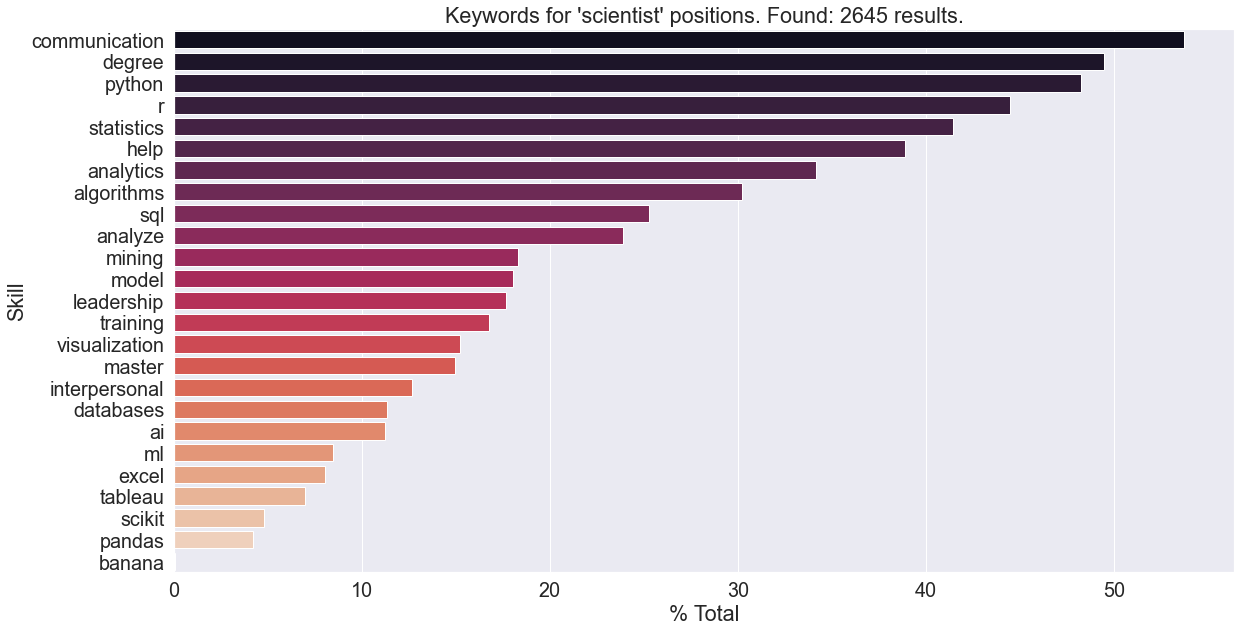

In [41]:
position = "scientist" #input a string 
keywords = ['python','r','statistics','sql','model','ai',
            'mining','tableau','scikit','pandas','ml','banana','degree','master',
            'excel','visualization','databases','help',
            'algorithms','analytics','interpersonal',
            'analyze','training','communication','leadership']

plot_keywords_per_job_title(position,keywords)